# K-means Clustering Analysis of California Housing Patterns

## Introduction

This notebook explores how K-means clustering can reveal fascinating patterns in California's housing market. By applying this unsupervised learning technique to housing data, we can discover natural groupings that help us understand both geographic and economic patterns across the state.

## Import Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Dataset Overview

The California housing dataset provides comprehensive information about housing blocks across the state, including:
- Geographic coordinates (latitude and longitude)
- Median house values
- Median income levels
- Population density
- Ocean proximity
- Housing-related metrics

Let's start by loading and examining our data:

In [118]:
# Load the dataset
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Exploration and Preprocessing

Let's examine our dataset's characteristics. dont worry if a lot of this doesn't make sense, just try to get the general idea. You will still be able to learn something without understanding every single detail or output.

In [ ]:
# Get general information about the dataset
# Tells us the number of rows, the number of columns, the data type of each column, and the number of non-null values in each column
print("Dataset Info:")
print(housing.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [ ]:
print("\nBasic Statistics:")
# Get basic statistics about the dataset
print(housing.describe())


Basic Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
2

In [ ]:
print("\nMissing Values:")
# Check for missing values
print(housing.isnull().sum())


Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Only one column has missing values. We will simply not use this column for any of our analysis. No other missing value handling is needed.

This cell is for programmers, if you do not understand do not worry.

### Visualizing Data Distributions

Look at these histograms and see what you observe, does anything stick out to you or seem interesting?

<Figure size 2000x1500 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

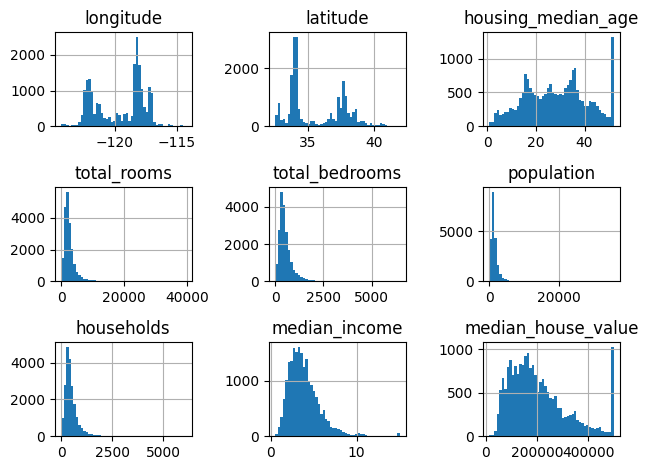

In [123]:
# Plot histograms of all numeric features
plt.figure(figsize=(20,15))
plt.figure(figsize=(16,12))
housing.hist(bins=50)
plt.tight_layout()
plt.show()

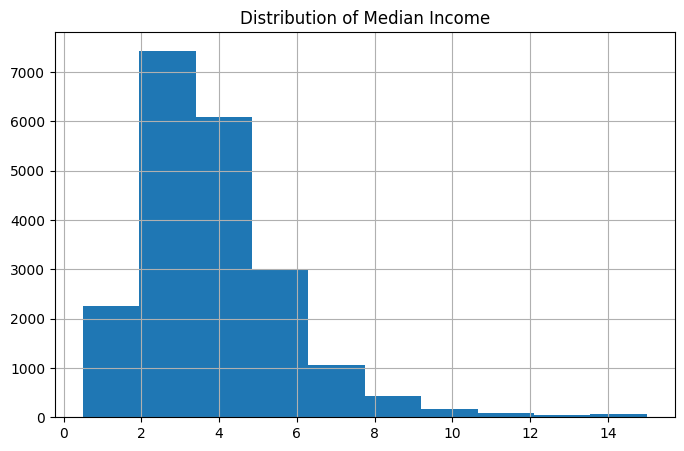

In [124]:
# Show distribution of median income specifically
plt.figure(figsize=(8,5))
housing["median_income"].hist()
plt.title("Distribution of Median Income")
plt.show()

### Geographic Visualization

The next 2 graphs are of the same thing. One is a more granular view qithout the image of California overlayed, and the second is the same information with a map of California overlayed to understand the context.

<Figure size 1000x700 with 0 Axes>

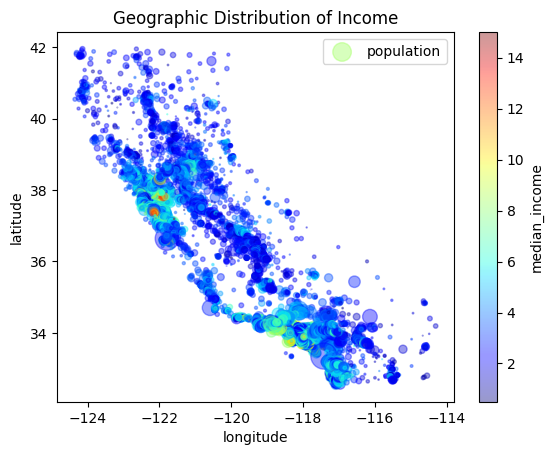

In [125]:
# Plot geographic distribution with income coloring
plt.figure(figsize=(10,7))
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, 
    label="population",
    c="median_income", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4
)
plt.legend()
plt.title("Geographic Distribution of Income")
plt.show()

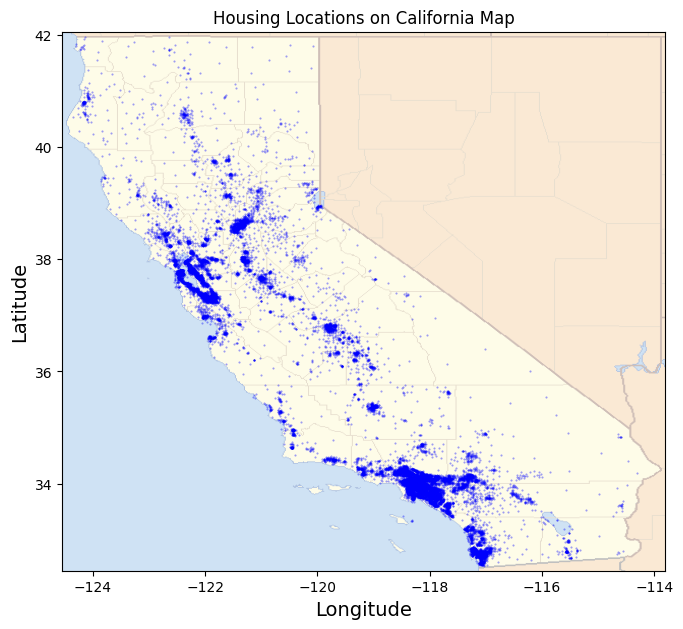

In [126]:
# Plot with California map overlay
california_img = imread('california.png')
plt.figure(figsize=(10,7))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.scatter(x=housing['longitude'], y=housing['latitude'], 
            color='b', marker='.', s=1, alpha=0.4)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Housing Locations on California Map")
plt.show()

### Handling Categorical Data

We need to convert categorical variables into numerical format for clustering:

#### What is Categorical Data?

Think of a typical job application form. It might ask you these questions:

1. How many years of experience do you have? (You answer: 5)
2. What's your age? (You answer: 28)
3. Which state do you live in? (You answer: California)
4. What's your education level? (You answer: Bachelor's Degree)

In this example, the first two questions (years of experience and age) use numbers as answers. A computer can easily work with these because it understands that 5 is less than 6, or that 28 is between 27 and 29.

But look at questions 3 and 4 - these have categorical answers. "California" and "Bachelor's Degree" are categories or labels, not numbers. These are categorical variables. Other examples include:
- Colors (red, blue, green)
- Car brands (Toyota, Ford, Honda)
- Weather conditions (sunny, rainy, cloudy)
- Blood types (A, B, AB, O)

Here's the challenge: computers and machine learning algorithms can only do math with numbers, not words. They don't understand that "California" is a state or that "Bachelor's Degree" is an education level. We need to convert these categories into numbers - this is called encoding.

But we can't just assign random numbers! For example, if we numbered states alphabetically:
- Alabama = 1
- Alaska = 2
- California = 3

This would be problematic because the computer might think Alabama (1) is somehow "less than" California (3), which doesn't make sense - they're just different states.

This is why we use a technique called "one-hot encoding." Instead of using a single number, we create separate yes/no columns for each possible category. For example, with states:

Original Data:
```
State
California
Alaska
California
```

After one-hot encoding:
```
Is_California  Is_Alaska
      1            0
      0            1
      1            0
```

Now each row uses 1s and 0s to show which state it is, and there's no implied ordering or ranking between states. It's like filling out a checklist - you're either in that state (1) or you're not (0).

In our California housing data, we have the "ocean_proximity" categorical variable which tells us how close a house is to the ocean (NEAR BAY, INLAND, etc.). We need to encode this into numbers so our clustering algorithm can use this information.

In [127]:
# Apply One-Hot Encoding to the categorical feature 'ocean_proximity'
housing=pd.get_dummies(housing)

## Location-Based Clustering Analysis

First, we'll cluster based on geographic location features:

In [128]:
# Select location-related features
data1 = housing[['longitude', 'latitude'] + housing.filter(like='ocean_proximity').columns.tolist()]
data1_values = data1.values

## Understanding Feature Normalization

Before we can apply K-means clustering, we need to normalize our features. But why is this step necessary?

### Why We Need Normalization

Imagine trying to cluster houses based on two features:
- Longitude: ranges from -124 to -114 (span of 10)
- Latitude: ranges from 32 to 42 (span of 10)
- Ocean proximity (one-hot encoded): always 0 or 1

Without normalization, the algorithm would treat a one-unit difference in latitude the same as a one-unit difference in ocean proximity, even though these scales are completely different in meaning and importance. This can lead to:
1. Features with larger scales dominating the clustering
2. Features with smaller scales being effectively ignored
3. Biased cluster assignments

Dont worry about how exactly MinMaxScaler works, just now it is normalizing.

In [129]:
# Normalize the features
scaler = MinMaxScaler()
data1n = scaler.fit_transform(data1_values)

# Show the effect of normalization in a clean, readable format
print("Before normalization (first 5 rows):")
original_df = pd.DataFrame(data1_values[:5], 
                          columns=['Longitude', 'Latitude'] + 
                                 [col for col in housing.filter(like='ocean_proximity').columns])
print(original_df.round(4).to_string(index=False))

print("\nAfter normalization (first 5 rows):")
normalized_df = pd.DataFrame(data1n[:5], 
                           columns=['Longitude', 'Latitude'] + 
                                  [col for col in housing.filter(like='ocean_proximity').columns])
print(normalized_df.round(4).to_string(index=False))

Before normalization (first 5 rows):
Longitude Latitude ocean_proximity_<1H OCEAN ocean_proximity_INLAND ocean_proximity_ISLAND ocean_proximity_NEAR BAY ocean_proximity_NEAR OCEAN
  -122.23    37.88                     False                  False                  False                     True                      False
  -122.22    37.86                     False                  False                  False                     True                      False
  -122.24    37.85                     False                  False                  False                     True                      False
  -122.25    37.85                     False                  False                  False                     True                      False
  -122.25    37.85                     False                  False                  False                     True                      False

After normalization (first 5 rows):
 Longitude  Latitude  ocean_proximity_<1H OCEAN  ocean_proximity_INL

<Figure size 1500x500 with 0 Axes>

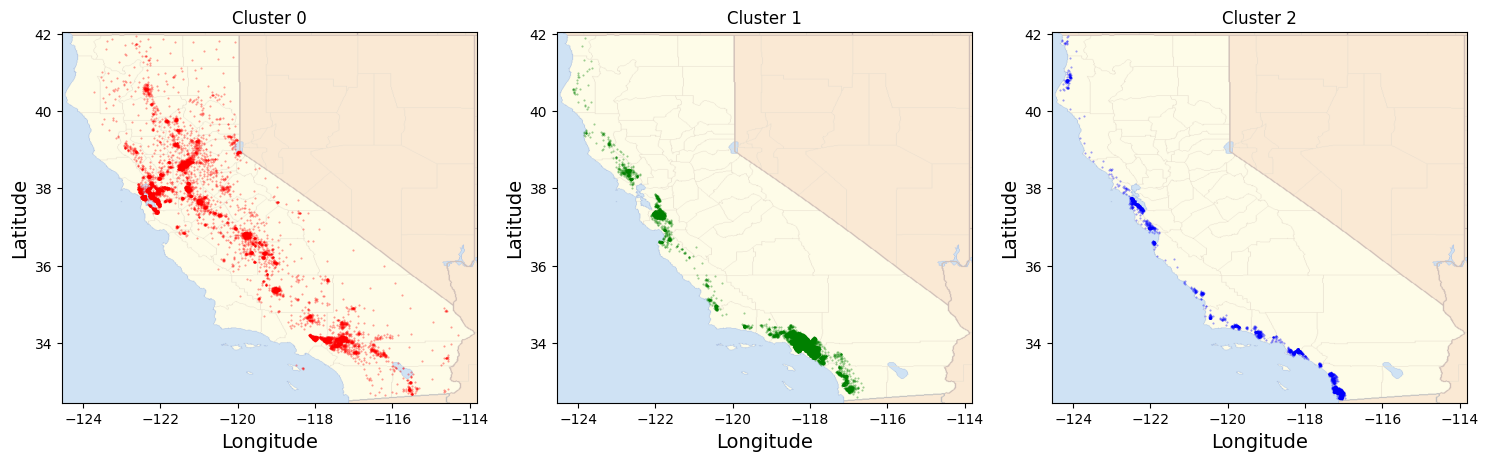

In [130]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3)
location_labels = kmeans.fit_predict(data1n)

# Visualize the clusters
plt.figure(figsize=(15,5))
color=['r', 'g', 'b']
fig, axes = plt.subplots(1,3, figsize=(15,5))

for k in range(3):
    axes[k].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    axes[k].scatter(x=data1_values[location_labels==k,0], 
                   y=data1_values[location_labels==k,1], 
                   color=color[k], marker='.', s=1, alpha=0.4)
    axes[k].set_ylabel("Latitude", fontsize=14)
    axes[k].set_xlabel("Longitude", fontsize=14)
    axes[k].set_title(f"Cluster {k}")

plt.tight_layout()
plt.show()

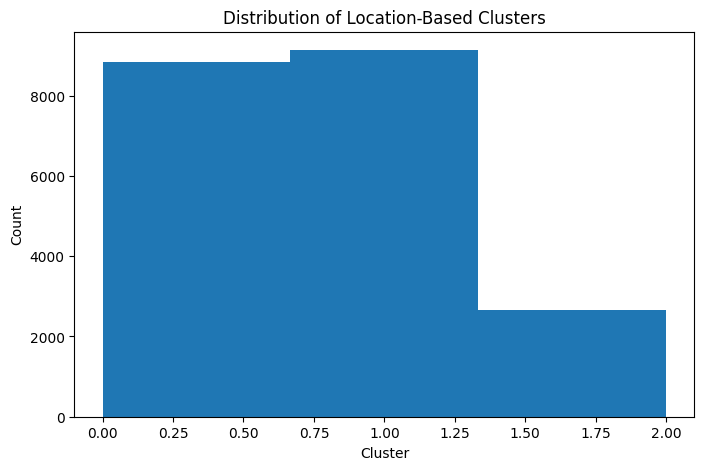

In [131]:
# Show distribution of clusters
plt.figure(figsize=(8,5))
plt.hist(location_labels, bins=3)
plt.title("Distribution of Location-Based Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


## Wealth-Based Clustering Analysis

Now, let's analyze patterns based on economic indicators:

<Figure size 1500x1000 with 0 Axes>

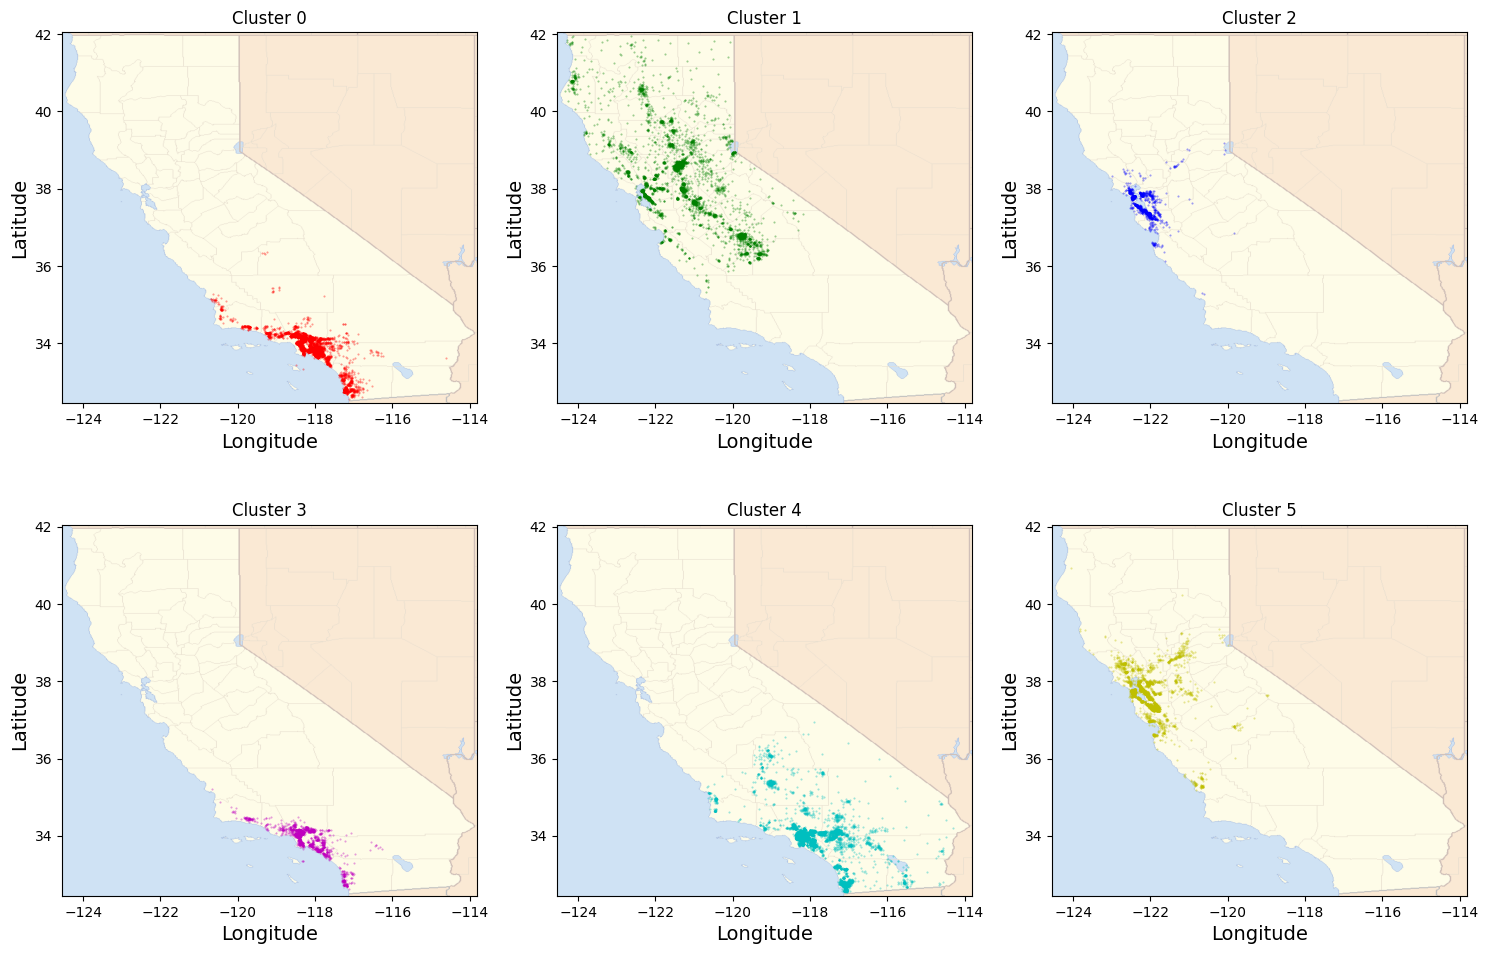

In [ ]:
# Select features for wealth-based clustering
data2 = housing[['longitude', 'latitude', 'median_income', 'median_house_value', 'population']]
data2_values = data2.values

# Normalize features
data2n = scaler.fit_transform(data2_values)

# Perform k-means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
wealth_labels = kmeans.fit_predict(data2n)  # Fit and predict

# Visualize clusters
plt.figure(figsize=(15,10))
colors = ['r', 'g', 'b', 'm', 'c', 'y']
fig, axes = plt.subplots(2,3, figsize=(15,10))

for k in range(6):
    row = k // 3
    col = k % 3
    axes[row,col].imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
    axes[row,col].scatter(x=data2_values[wealth_labels==k,0], 
                         y=data2_values[wealth_labels==k,1], 
                         color=colors[k], marker='.', s=1, alpha=0.4)
    axes[row,col].set_ylabel("Latitude", fontsize=14)
    axes[row,col].set_xlabel("Longitude", fontsize=14)
    axes[row,col].set_title(f"Cluster {k}")

plt.tight_layout()
plt.show()

In [135]:
# Analyze cluster characteristics
print("\nAverage Median Income by Cluster (in 10,000s):")
for k in range(6):
    cluster_income = data2_values[wealth_labels==k, 2]
    print(f"Cluster {k}: ${cluster_income.mean():,.2f}")


Average Median Income by Cluster (in 10,000s):
Cluster 0: $4.41
Cluster 1: $2.73
Cluster 2: $6.55
Cluster 3: $6.71
Cluster 4: $2.85
Cluster 5: $4.29


<Figure size 1500x1000 with 0 Axes>

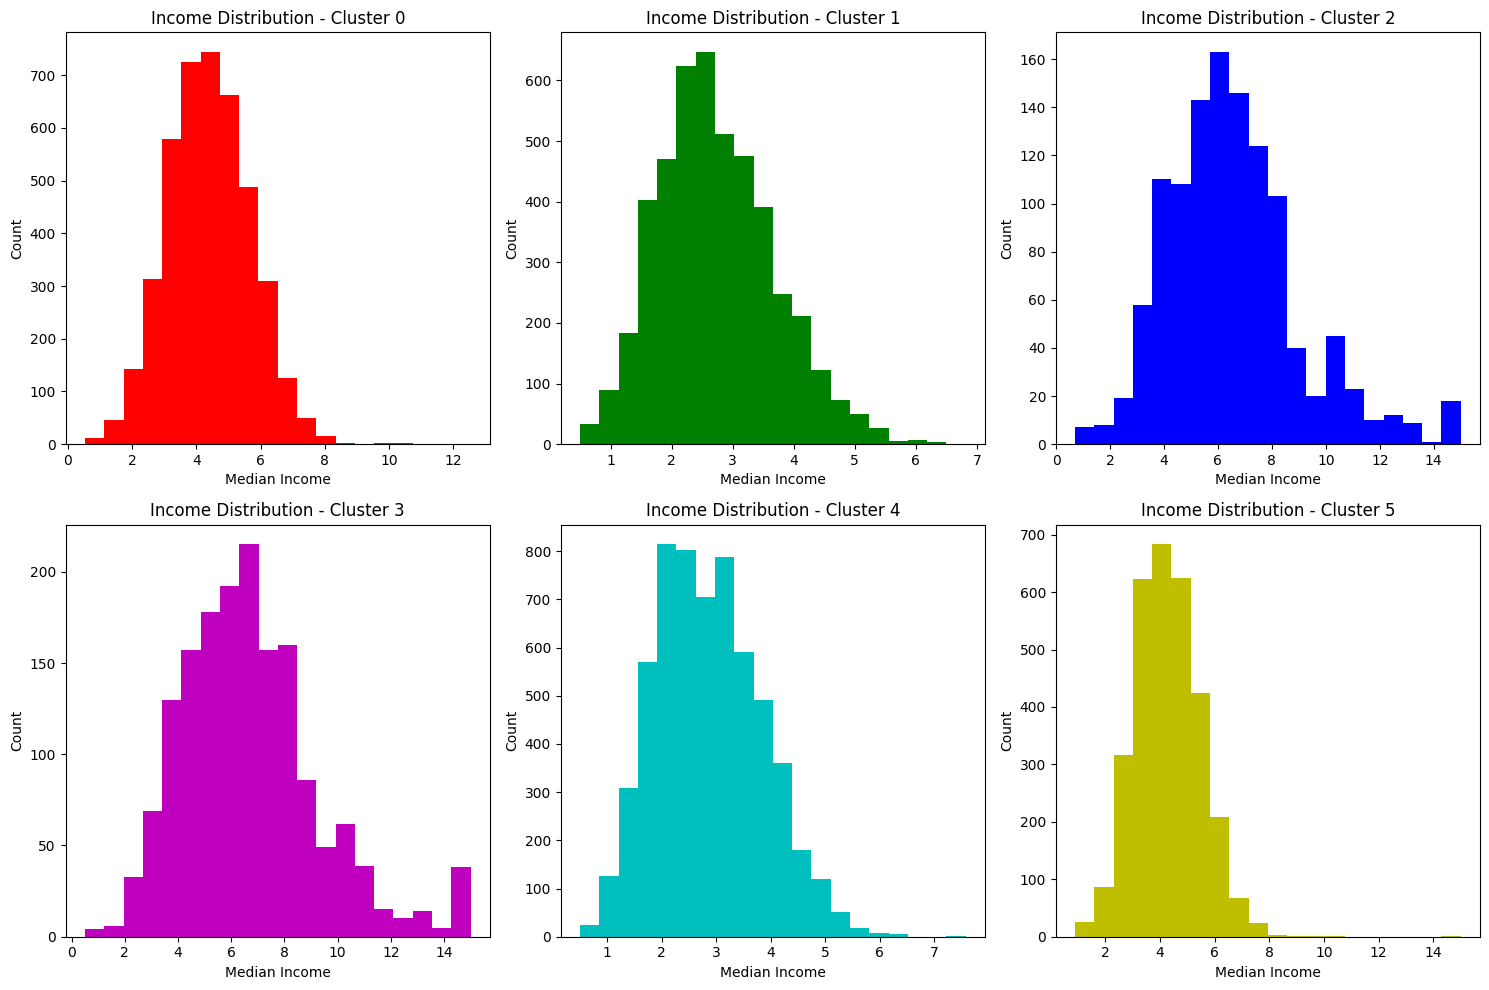

In [134]:
# Visualize income distribution within clusters
plt.figure(figsize=(15,10))
fig, axes = plt.subplots(2,3, figsize=(15,10))
for k in range(6):
    row = k // 3
    col = k % 3
    axes[row,col].hist(data2_values[wealth_labels==k, 2], bins=20, color=colors[k])
    axes[row,col].set_title(f"Income Distribution - Cluster {k}")
    axes[row,col].set_xlabel("Median Income")
    axes[row,col].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Key Findings and Conclusions

Our analysis revealed several interesting patterns in California's housing market:

1. Geographic Patterns:
   - Clear coastal-inland divide
   - Distinct northern and southern coastal regions
   - Urban centers form their own clusters

2. Economic Patterns:
   - Strong correlation between coastal location and wealth
   - Urban centers show high wealth concentration
   - Some surprising low-income coastal areas

3. Notable Anomalies:
   - High-value areas with low income levels (possibly retirement communities)
   - Urban wealth clusters in inland regions
   - Mixed-income coastal regions

These findings have important implications for:
- Urban planning and development
- Real estate investment strategies
- Housing policy decisions
- Understanding demographic patterns

The combination of geographic and economic clustering provides a powerful framework for understanding California's complex housing market dynamics.